<a href="https://colab.research.google.com/github/23521316/ComputerVision/blob/main/BarcodeQRGenerationandReading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will b

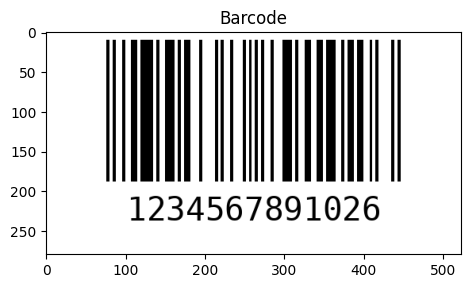

In [3]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
    EAN13('123456789102', writer=ImageWriter()).write(f)

    barcode = cv2.imread('barcode.png')
    imshow('Barcode', barcode)

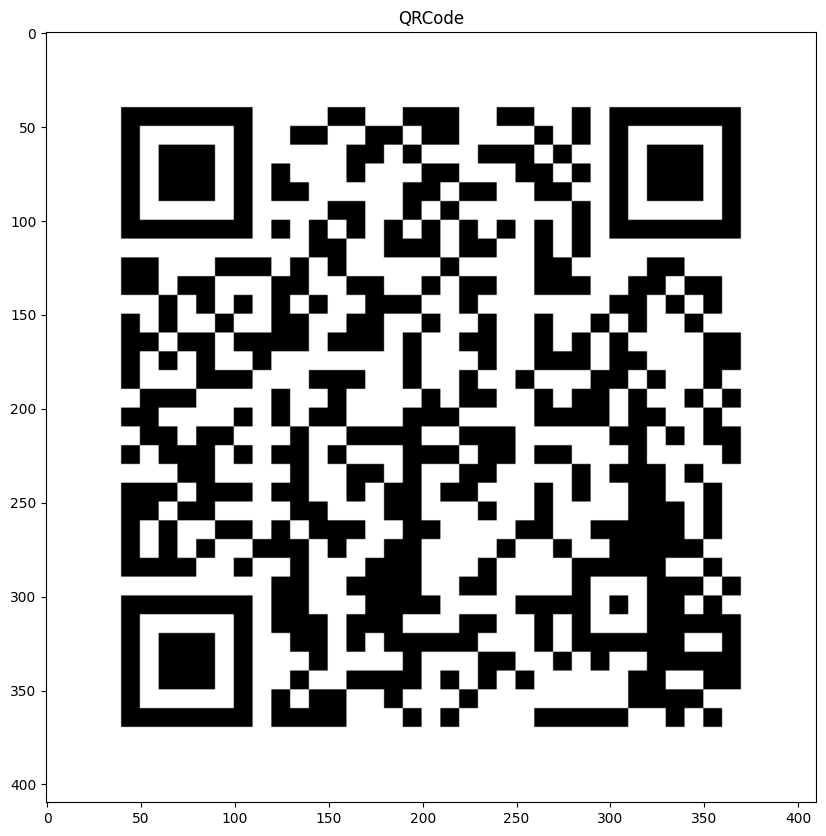

In [4]:
import qrcode
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

qr.add_data('https://www.notion.so/AI-8f49c0bdddaf4bf2b67fa0d5d4a53b04')
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save('qr.png')

qrcode = cv2.imread('qr.png')
imshow('QRCode', qrcode)

In [5]:
from pyzbar.pyzbar import decode
from PIL import Image
img = cv2.imread('qr.png')
decoded = decode(img)

for i in decoded:
  print(i.data.decode('utf-8'))


https://www.notion.so/AI-8f49c0bdddaf4bf2b67fa0d5d4a53b04


In [6]:
!wget https://i.stack.imgur.com/1DwED.jpg

--2024-11-10 02:04:45--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 172.64.155.170, 104.18.32.86, 2606:4700:4400::ac40:9baa, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|172.64.155.170|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://i.sstatic.net/1DwED.jpg [following]
--2024-11-10 02:04:45--  https://i.sstatic.net/1DwED.jpg
Resolving i.sstatic.net (i.sstatic.net)... 104.18.41.33, 172.64.146.223
Connecting to i.sstatic.net (i.sstatic.net)|104.18.41.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg’

1DwED.jpg           100%[===================>] 429.15K  --.-KB/s    in 0.03s   

2024-11-10 02:04:46 (12.2 MB/s) - ‘1DwED.jpg’ saved [439449/439449]



[Point(x=558, y=938), Point(x=588, y=1288), Point(x=916, y=1275), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


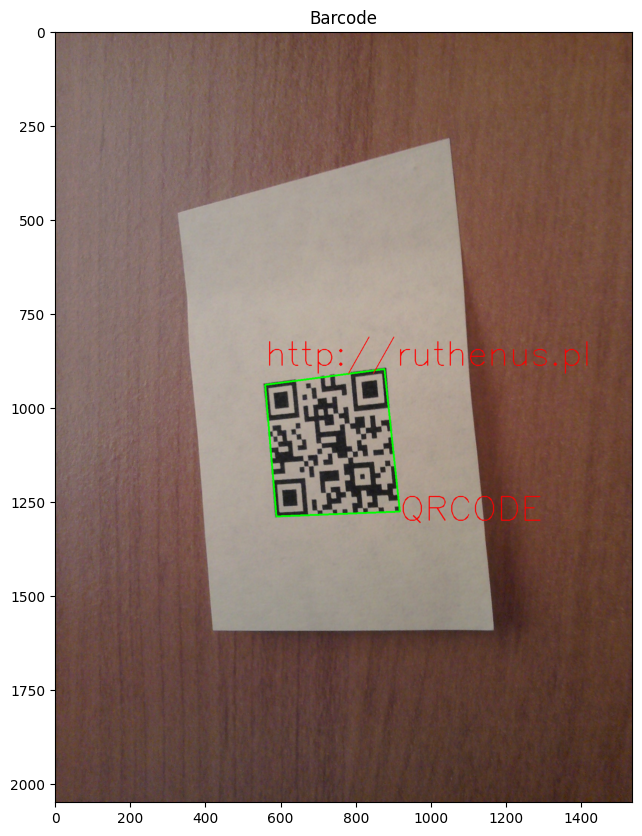

In [9]:
from pyzbar.pyzbar import decode
from PIL import Image

image = cv2.imread('1DwED.jpg')
decoded = decode(image)

for bc in decoded:
  (x, y, w, h) = bc.rect
  print(bc.polygon)
  pt1, pt2, pt3, pt4 = bc.polygon

  pts = np.array([[pt1.x, pt1.y], [pt2.x, pt2.y], [pt3.x, pt3.y], [pt4.x, pt4.y]], np.int32)
  pts = pts.reshape((-1, 1, 2))
  cv2.polylines(image, [pts], True, (0, 255, 0), 3)

  barcode_text = bc.data.decode('utf-8')
  barcodeType = bc.type

  text = "{} ({})".format(barcode_text, barcodeType)
  cv2.putText(image, barcode_text, (x, y -10), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2)
  cv2.putText(image, barcodeType, (x + w, y + h + 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2)
  print("QR Code revealed: {}".format(text))

imshow('Barcode', image)


In [10]:
!wget https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg

--2024-11-10 02:28:56--  https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg
Resolving www.differencebetween.com (www.differencebetween.com)... 104.21.75.79, 172.67.217.144, 2606:4700:3034::ac43:d990, ...
Connecting to www.differencebetween.com (www.differencebetween.com)|104.21.75.79|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-11-10 02:28:56 ERROR 403: Forbidden.

